<a href="https://colab.research.google.com/github/Tclack88/CS/blob/master/pre-endorsement-sprint/puzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
data_source = "https://raw.githubusercontent.com/Tclack88/CS/master/pre-endorsement-sprint/puzzle.csv"
import pandas as pd
df = pd.read_csv(data_source, names=['a','b'])
df.head(10)

,a,b
0,0.397150,2.113629
1,0.397150,2.113629
2,0.397150,2.113629
3,0.397150,2.113629
4,0.397150,2.113629
5,0.397150,2.113629
6,0.397150,2.113629
7,0.397150,2.113629
8,0.967562,-0.099246
9,0.061841,-1.333110


# Begin exploration, most of this is nonsense and can be ignored

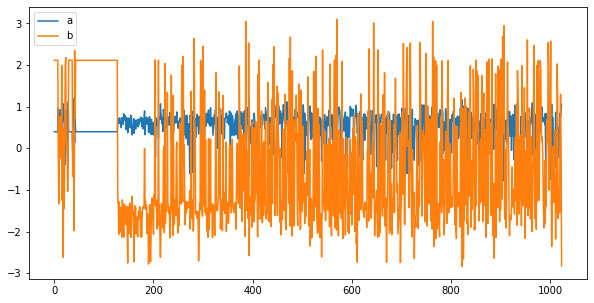

In [0]:
# Explore the plot for information
df.plot(figsize=(10,5));

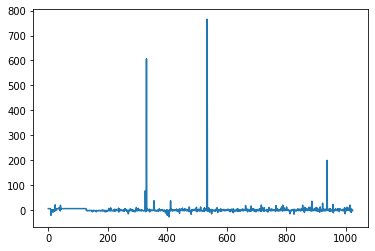

In [0]:
df_sum = df.b / df.a
df_sum.plot()

## The key discovery came from looking back at this plot, specifically the pair plot of the upper right grid

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


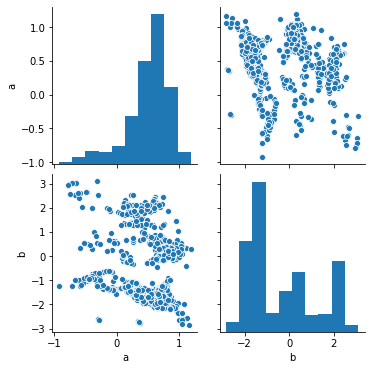

In [0]:
import seaborn as sb
sb.pairplot(df)

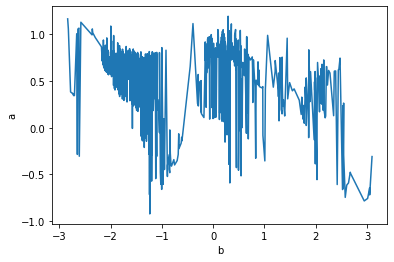

In [0]:
sb.lineplot(x=df.b, y=df.a)

In [0]:
df2 = df.groupby('a')

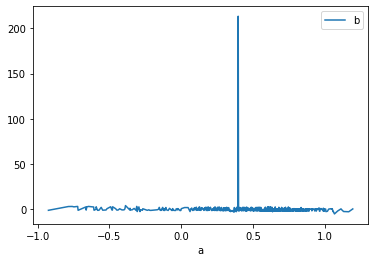

In [0]:
df2.sum().plot()

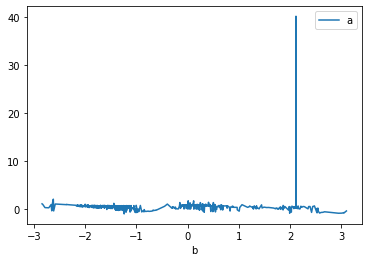

In [0]:
df3 = df.groupby('b')
df3.sum().plot()

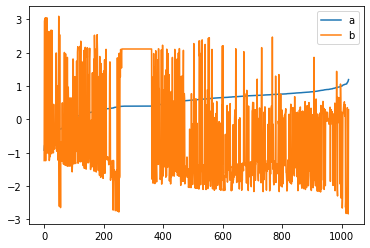

In [0]:
df4 = df.sort_values('a')
df4 = df4.reset_index()
df4 = df4[['a','b']]
df4.plot()

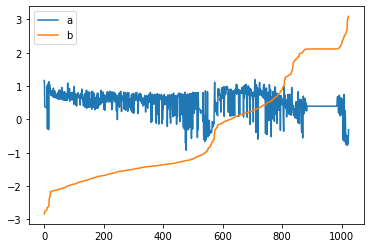

In [0]:
df5 = df.sort_values('b')
df5 = df5.reset_index()
df5 = df5[['a','b']]
df5.plot()

# End exploration above. I checked the scatter plot with seaborn which spread out the horiontal axis a little better and made the pattern stand out a little better

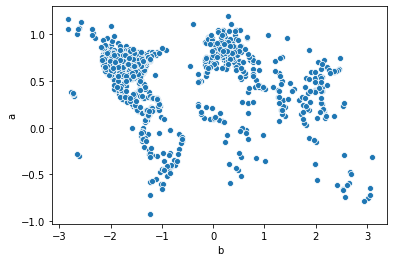

In [84]:
sb.scatterplot(df.b,df.a);

In [0]:
#This vaguely appears like a world map:
img_address = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/World_blank_map_countries.PNG/800px-World_blank_map_countries.PNG"
# in retrospect, this makes sense because it's from a "major online travel booking company"

![world map](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/World_blank_map_countries.PNG/800px-World_blank_map_countries.PNG)

In [0]:
# To confirm, I can multiply the vertical (df.a, or latitude) by 90
# and the horizontal (df.b or longitude) by 90

In [132]:
print(df.a.min(), df.a.max())
print(df.b.min(), df.b.max())

-0.9250699 1.1953987
-2.8378879 3.0969645


In [142]:
# NOTE: the min and max don't line up perfectly with -1/+1 and -3/+3
# If it did, I would be able to scle by 90 and 60 respectively.
# I've instead "played" with the scaling to get it to fit nicely on the world map below
# these points likely represent locations of world cities
map_df = df.copy()
map_df.a = map_df.a*70
map_df.b = map_df.b*58
map_df.columns=['lat','lon']
map_df

,lat,lon
0,27.800479,122.590459
1,27.800479,122.590459
2,27.800479,122.590459
3,27.800479,122.590459
4,27.800479,122.590459
...,...,...
1019,46.126437,-90.105134
1020,59.079468,35.532024
1021,52.609298,75.392999
1022,63.477330,4.491758


In [0]:
!sudo apt-get install libgeos-3.5.0
!sudo apt-get install libgeos-dev
!sudo pip install https://github.com/matplotlib/basemap/archive/master.zip

In [0]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

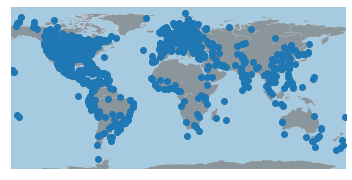

In [143]:
m=Basemap(llcrnrlon=-160, llcrnrlat=-75,urcrnrlon=180,urcrnrlat=90) # NOTE: basemap
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)                # code copied
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')        # from here:
m.drawcoastlines(linewidth=0.1, color="white")                      # https://python-graph-gallery.com/310-basic-map-with-markers/
m.plot(map_df.lon,map_df.lat,linestyle='none',marker='o')
plt.show();

### It's not perfect, but it's definitely a world map
It may be the projection type doesn't quite match up, but it's probably not a coincidence that it resembles a world map given it's an online travel booking agency. There are repeat values which probably represent the most popular destinations. With more time, I could adjust marker size to reflect the popular destinations